- Use the Pima Indians dataset from UCI to predict whether or not an individual has diabetes
    - outcome is a binary variable
- Binary classification 


pima indians dataset: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [34]:
import pandas as pd
import scipy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
from sklearn.model_selection import train_test_split

# Load dataset

In [16]:
features = ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age']
target = ['outcome']
pima_columns =  ['pregnancies', 'glucose', 'blood_pressure', 'skin_thickness', 'insulin', 'bmi', 'diabetes_pedigree_function', 'age', 'outcome']

In [12]:
pima_df = pd.read_csv("pima-indians-diabetes.data.csv", header = None, names = pima_columns)

In [13]:
pima_df.head(10)

,pregnancies,glucose,blood_pressure,skin_thickness,insulin,bmi,diabetes_pedigree_function,age,outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [14]:
pima_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   pregnancies                 768 non-null    int64  
 1   glucose                     768 non-null    int64  
 2   blood_pressure              768 non-null    int64  
 3   skin_thickness              768 non-null    int64  
 4   insulin                     768 non-null    int64  
 5   bmi                         768 non-null    float64
 6   diabetes_pedigree_function  768 non-null    float64
 7   age                         768 non-null    int64  
 8   outcome                     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- there is no non-null data so no imputation is needed
- only 767 entries

# Explore Correlations

How are the features within this dataset correlated?

What does that mean if there is or isn't correlation?

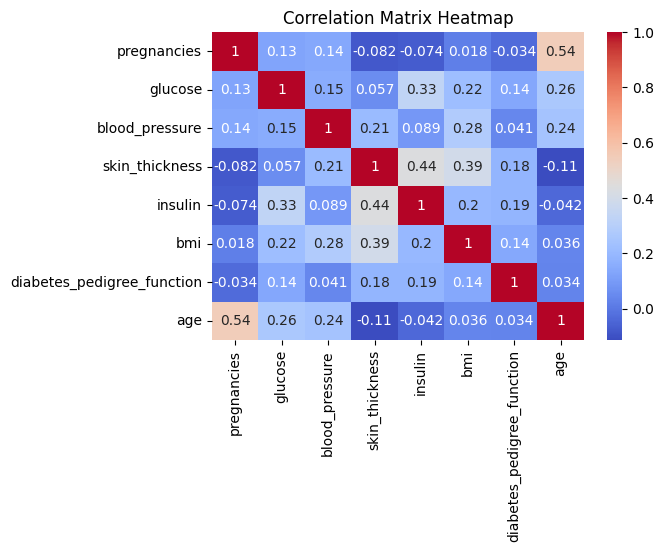

In [25]:

corr_matrix = pima_df[features].corr() # create corr. matrix

# create heatmap plot
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # fmt =".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


- the highest correlation between age and pregancies, however that is not surprising as you must be older in order to have had more pregnancies
- the next highest correlation is between skin thickness and insulin, unsure if there is a biological explanation for that, but the coefficient is not necessily very strong
- correlation between insulin and glucose is only 0.33, diabetes is a disease where the body's ability to break down glucose is impaired so what would be better is to perhaps do two plots: one for those with diabetes and those without

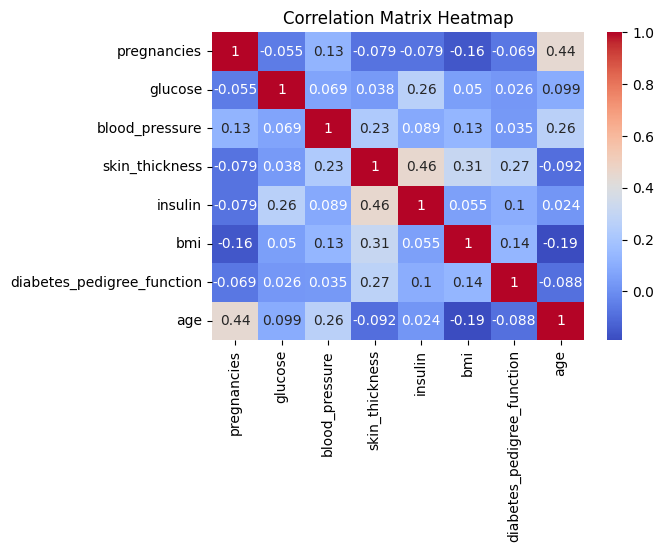

In [ ]:
corr_matrix = pima_df[features][pima_df['outcome'] == 1].corr() # create corr. matrix

# create heatmap plot
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # fmt =".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


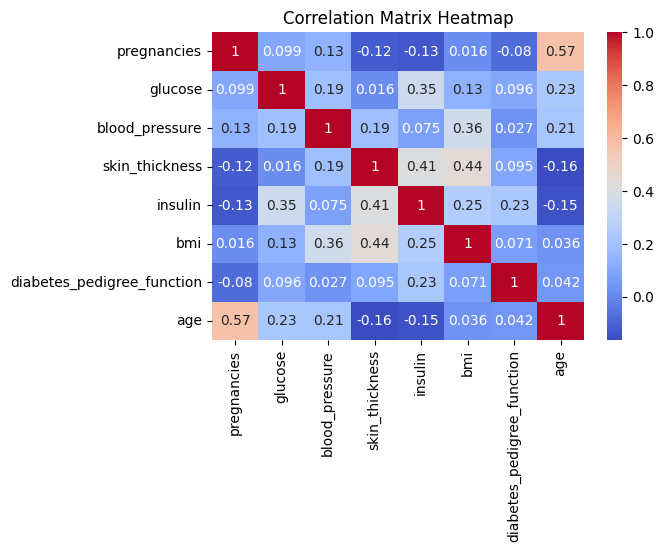

In [27]:
corr_matrix = pima_df[features][pima_df['outcome'] == 0].corr() # create corr. matrix

# create heatmap plot
plt.figure(figsize=(6,4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') # fmt =".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


- when we look at those without diabetes the correlation between insulin and glucose was higher
- the correlation between age and pregnancies also became higher when controlling for diabetes, but that may not be causal as mothers may be more likely to attempt to have children when they do not have serious medical problems

# Feature Standardization

Do the features need to be standardized in some way?

If so how? MinMax, Standard?

# Model Training

In [37]:
X = pima_df[features]
y = pima_df[target]

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=100)

In [33]:
model = Sequential()
model.add(Dense(1, input_shape = (8,), activation ='sigmoid'))
adam = Adam(learning_rate=0.05)
model.compile(adam, loss='binary_crossentropy' , metrics=['accuracy'])

/Users/thomascampbell/code/.venv/lib/python3.9/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [39]:
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.4830 - loss: 35.3550
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 674us/step - accuracy: 0.4985 - loss: 6.1116
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 600us/step - accuracy: 0.5309 - loss: 3.2023
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.6684 - loss: 0.8506
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 487us/step - accuracy: 0.5759 - loss: 0.9166
Epoch 6/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 532us/step - accuracy: 0.6470 - loss: 0.7700
Epoch 7/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.5940 - loss: 1.8368
Epoch 8/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 605us/step - accuracy: 0.6290 - loss: 1.0289
Epoch 9/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 433us/step - accuracy: 0.6872 - loss: 0.7395
Epoch 10/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.6759 - loss: 0.6912


In [41]:
results = model.evaluate(X_test, y_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6197 - loss: 0.9931


better than 50%, so slightly better than a coin toss

# Model Evaluation

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
y_train_predict = model.predict_classes(X_train)
y_test_predict = model.predict_classes(X_test)

print("The Accuracy score on the Train ")